# Sentiment Analysis Notebook

## Introduction

This notebook contains the final implementation for sentiment analysis using various machine learning models. The process involves data preprocessing, feature extraction, model training, hyperparameter tuning, and evaluation.

* In here used relabeled dataset & its contain more than `10000` data.

## Importing Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

from scipy.sparse import csr_matrix,hstack

import re
import string

## Data Loading


In [ ]:
synthetic_train = pd.read_excel('student_feedback_train.xlsx',index_col=False)
synthetic_train


,sentence,topic,Score sentiment,Sentiment Range,Sentiment Label
0,The cost of this job is very demanding and the...,tutor,0.500000,0.5,Neutral
1,There are not enough people to listen and list...,tutor,0.500000,0.5,Neutral
2,The price of this job is so small that it cann...,tutor,0.500000,0.5,Neutral
3,"Mom—I don't know what I'm talking about, I don...",tutor,0.500000,0.5,Neutral
4,The price of the job is too low for the sales ...,tutor,0.500000,0.5,Neutral
...,...,...,...,...,...
10141,item practical useful,others,0.967135,1.0,Positive
10142,good understanding always evaluating price,others,0.953008,1.0,Positive
10143,fish price unreliable price high price range,others,0.802780,0.9,Positive
10144,detailed quite bit detailed analysis,others,0.928498,1.0,Positive


## Data Exploration

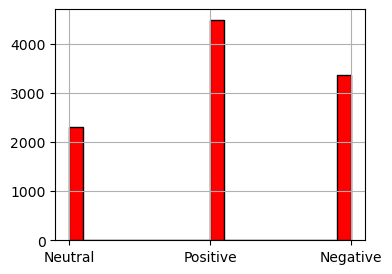

In [ ]:
synthetic_train['Sentiment Label'].hist(bins=20, figsize=(4,3), color='r', edgecolor='black')
plt.show()

In [ ]:
# Lets get the length of the mesages
length_of_sentence = synthetic_train['sentence'].str.len()
length_of_sentence.describe()

count    10146.000000
mean         6.013897
std          2.638739
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         20.000000
Name: sentence, dtype: float64

## Text Processing

###Cleaning Text Data


In [ ]:
def clean_text(text):
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]', '', text)
    # Remove special symbols except for specific punctuation
    text = re.sub(r'[^\w\s,.!?]', '', text)
    # Remove links (URLs)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove leading and trailing whitespace
    text = text.strip()
    return text.lower()

In [ ]:
# Apply the function to the column
synthetic_train['sentence'] = synthetic_train['sentence'].apply(clean_text)

In [ ]:
# Installing contractions
!pip install contractions

## Label Encoding

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'sentiment' column in the training DataFrame
synthetic_train['sentiment_label_no'] = label_encoder.fit_transform(synthetic_train['Sentiment Label'])
synthetic_train

,sentence,topic,Score sentiment,Sentiment Range,Sentiment Label,sentiment_label_no
0,the cost of this job is very demanding and the...,tutor,0.500000,0.5,Neutral,1
1,there are not enough people to listen and list...,tutor,0.500000,0.5,Neutral,1
2,the price of this job is so small that it cann...,tutor,0.500000,0.5,Neutral,1
3,"momi dont know what im talking about, i dont k...",tutor,0.500000,0.5,Neutral,1
4,the price of the job is too low for the sales ...,tutor,0.500000,0.5,Neutral,1
...,...,...,...,...,...,...
10141,item practical useful,others,0.967135,1.0,Positive,2
10142,good understanding always evaluating price,others,0.953008,1.0,Positive,2
10143,fish price unreliable price high price range,others,0.802780,0.9,Positive,2
10144,detailed quite bit detailed analysis,others,0.928498,1.0,Positive,2


In [ ]:
synthetic_train['Sentiment Label'].value_counts()

Sentiment Label
Positive    4479
Negative    3359
Neutral     2308
Name: count, dtype: int64

## Text Cleaning with NLTK



In [ ]:
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Tokenization, Stop Words Removal, and Lemmatization

In [ ]:
def message_cleaning(message):
    # Initialize the WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Expand contractions
    message = contractions.fix(message)

    # Remove punctuation
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)

    # Tokenize the message
    tokens = word_tokenize(punc_removed_join)

    # Remove stop words and apply lemmatization
    stop_words = set(stopwords.words('english'))
    cleaned_message = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]

    return cleaned_message

In [ ]:
def message_cleaning_deep(message):
    # Initialize the WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Expand contractions
    message = contractions.fix(message)

    # Remove punctuation
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)

    # Tokenize the message
    tokens = word_tokenize(punc_removed_join)

    # Remove stop words and apply lemmatization
    stop_words = set(stopwords.words('english'))
    cleaned_words = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]

    # Join the cleaned words back into a single string
    cleaned_message = ' '.join(cleaned_words)

    return cleaned_message

In [ ]:
synthetic_train_deep_learining = synthetic_train.copy()
synthetic_train_deep_learining['sentence'] = synthetic_train_deep_learining['sentence'].apply(message_cleaning_deep)

In [ ]:
synthetic_train['sentence'] = synthetic_train['sentence'].apply(message_cleaning)

In [ ]:
synthetic_train

,sentence,topic,Score sentiment,Sentiment Range,Sentiment Label,sentiment_label_no
0,"[cost, job, demanding, student, able, cope]",tutor,0.500000,0.5,Neutral,1
1,"[enough, people, listen, listen, opinion, stud...",tutor,0.500000,0.5,Neutral,1
2,"[price, job, small, changed, individually]",tutor,0.500000,0.5,Neutral,1
3,"[momus, know, talking, know, going]",tutor,0.500000,0.5,Neutral,1
4,"[price, job, low, sale, person, student, affec...",tutor,0.500000,0.5,Neutral,1
...,...,...,...,...,...,...
10141,"[item, practical, useful]",others,0.967135,1.0,Positive,2
10142,"[good, understanding, always, evaluating, price]",others,0.953008,1.0,Positive,2
10143,"[fish, price, unreliable, price, high, price, ...",others,0.802780,0.9,Positive,2
10144,"[detailed, quite, bit, detailed, analysis]",others,0.928498,1.0,Positive,2


## Feature Engineering

###one hot encoding

In [ ]:
# Divide topic using one hot encoding
synthetic_train = pd.get_dummies(synthetic_train, columns=['topic'], prefix='', prefix_sep='')

In [ ]:
synthetic_train.shape

(10146, 9)

### TF-IDF Vectorization


In [ ]:
def vectorize_text_data(train_df, min_df=3):
    """
    Applies TF-IDF vectorization to the text data from training and test DataFrames.

    Parameters:
    - train_df: pandas DataFrame containing the training data with a text column.
    - test_df: pandas DataFrame containing the test data with a text column.
    - min_df: int, minimum document frequency for the TF-IDF vectorizer.

    Returns:
    - X_tfidf_train: sparse matrix, TF-IDF features for the training data.
    - X_tfidf_test: sparse matrix, TF-IDF features for the test data.
    """
    # Initialize the TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(min_df=min_df,ngram_range=(1, 3))

    # Convert the text column to a space-separated string if it's a list of tokens
    train_text = train_df['sentence'].apply(lambda x: ' '.join(x))


    # Fit and transform the training data
    X_tfidf_train = tfidf_vectorizer.fit_transform(train_text)

    # Transform the test data

    return X_tfidf_train


In [ ]:
# Assuming `synthetic_train` and `synthetic_test` are your DataFrames
X_tfidf_train = vectorize_text_data(
    synthetic_train, min_df=5
)

In [ ]:
def combine_features(text_features, additional_features):
    """
    Combines text features with additional features into a single feature matrix.

    Parameters:
    - text_features: sparse matrix, TF-IDF features for the text data.
    - additional_features: pandas DataFrame containing the additional features.

    Returns:
    - combined_features: sparse matrix, combined features including text and additional features.
    """
    # Convert additional features to a sparse matrix
    additional_features_sparse = csr_matrix(additional_features.values)

    # Combine TF-IDF features with additional features
    combined_features = hstack([text_features, additional_features_sparse])

    return combined_features

In [ ]:
# Combine TF-IDF features with additional features
X_train_tfidf_combined = combine_features(X_tfidf_train, synthetic_train[['curriculum', 'facility', 'others', 'tutor']])

In [ ]:
X_tfidf_train.shape

(10146, 2698)

## Training the model

In [ ]:
from sklearn.model_selection import train_test_split


y_train = synthetic_train['sentiment_label_no']
# Assuming y_train is your target variable for training
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf_combined, y_train, test_size=0.2, random_state=42)


In [ ]:
#Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB(),
    'XGBoost': XGBClassifier()
}

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Train and evaluate the given model.

    Parameters:
    - model: an instance of a scikit-learn or XGBoost classifier
    - X_train: the training feature matrix
    - y_train: the training labels
    - X_test: the test feature matrix
    - y_test: the test labels

    Returns:
    - None
    """
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    # Evaluate the model
    print(f"Model: {model.__class__.__name__}")
    print(f"Testing accuracy {model.score(X_test, y_test)}")
    print(f"Training accuracy {model.score(X_train, y_pred_train)} ")
    print(classification_report(y_test, y_pred))

In [ ]:
from tqdm import tqdm
import time

# Number of models to train
total_models = len(models)

# Loop through models with a progress bar
for i, (name, model) in enumerate(tqdm(models.items(), desc="Training models", total=total_models), start=1):
    print(f"\nTraining and evaluating {name}... ({i}/{total_models})")
    start_time = time.time()

    # Train and evaluate the model
    train_and_evaluate_model(model, X_train, y_train, X_test, y_test)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"{name} training and evaluation took {elapsed_time:.2f} seconds.")

Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]


Training and evaluating Logistic Regression... (1/5)


Training models:  20%|█████████████▍                                                     | 1/5 [00:00<00:02,  1.80it/s]

Model: LogisticRegression
Testing accuracy 0.6679802955665025
Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       687
           1       0.64      0.58      0.61       464
           2       0.68      0.78      0.73       879

    accuracy                           0.67      2030
   macro avg       0.66      0.65      0.65      2030
weighted avg       0.67      0.67      0.66      2030

Logistic Regression training and evaluation took 0.56 seconds.

Training and evaluating Random Forest... (2/5)
Model: RandomForestClassifier
Testing accuracy 0.6295566502463055


Training models:  40%|██████████████████████████▊                                        | 2/5 [00:27<00:48, 16.28s/it]

Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.68      0.52      0.59       687
           1       0.57      0.50      0.54       464
           2       0.63      0.78      0.70       879

    accuracy                           0.63      2030
   macro avg       0.63      0.60      0.61      2030
weighted avg       0.63      0.63      0.62      2030

Random Forest training and evaluation took 27.28 seconds.

Training and evaluating SVM... (3/5)
Model: SVC
Testing accuracy 0.6369458128078818


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [01:29<01:14, 37.04s/it]

Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.67      0.54      0.60       687
           1       0.61      0.46      0.53       464
           2       0.63      0.80      0.70       879

    accuracy                           0.64      2030
   macro avg       0.64      0.60      0.61      2030
weighted avg       0.64      0.64      0.63      2030

SVM training and evaluation took 61.74 seconds.

Training and evaluating Naive Bayes... (4/5)
Model: MultinomialNB
Testing accuracy 0.6280788177339901
Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       687
           1       0.62      0.39      0.48       464
           2       0.63      0.80      0.70       879

    accuracy                           0.63      2030
   macro avg       0.63      0.59      0.59      2030
weighted avg       0.63      0.63      0.62      2030

Naive Bayes training and evaluation took 

Training models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [01:39<00:00, 19.82s/it]

Model: XGBClassifier
Testing accuracy 0.6482758620689655
Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.71      0.52      0.60       687
           1       0.60      0.57      0.59       464
           2       0.64      0.79      0.70       879

    accuracy                           0.65      2030
   macro avg       0.65      0.63      0.63      2030
weighted avg       0.65      0.65      0.64      2030

XGBoost training and evaluation took 9.47 seconds.


## Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

import time

In [ ]:
# Expanded hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],  # Simplified range
        'solver': ['liblinear', 'lbfgs', 'saga'],  # Commonly used solvers
        'penalty': ['l2'],  # Common penalty
        'max_iter': [100, 500, 1000]  # Sufficient for most cases
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 6],
        'bootstrap': [True, False],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4],
        'coef0': [0.0, 0.1, 0.5, 1.0]
    },
    'Naive Bayes': {
        'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
        'fit_prior': [True, False]
    },
    'XGBoost':
        {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'gamma': [0, 0.1],
        'reg_alpha': [0.1],
        'reg_lambda': [0.5, 1.0]
  }

    #   {
    #     'n_estimators': [50, 100, 200, 300],
    #     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    #     'max_depth': [3, 5, 7, 9, 11],
    #     'subsample': [0.6, 0.8, 1.0],
    #     'colsample_bytree': [0.6, 0.8, 1.0],
    #     'gamma': [0, 0.1, 0.2, 0.3],
    #     'reg_alpha': [0, 0.1, 0.5, 1.0],
    #     'reg_lambda': [0.1, 0.5, 1.0, 2.0]
    # }
}


In [ ]:
# Function to perform Grid Search
def tune_model(model, param_grid, X_train, y_train):
    """
    Tunes a machine learning model using GridSearchCV and returns the best model and parameters.

    Parameters:
    - model: The machine learning model to be tuned.
    - param_grid: The parameter grid for GridSearchCV.
    - X_train: The training features.
    - y_train: The training labels.

    Returns:
    - best_model: The best model after tuning.
    - best_params: The best parameters found by GridSearchCV.
    """
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

In [ ]:
def training_tune_model(model_name, model, param_grids, X_train, y_train, best_models):
    """
    Tunes and logs the best model and parameters for a given model.

    Parameters:
    - model_name: The name of the model for logging purposes.
    - model: The machine learning model to be tuned.
    - param_grids: Dictionary containing hyperparameter grids for each model.
    - X_train: The training features.
    - y_train: The training labels.
    - best_models: Dictionary to store the best model for each model_name.
    """
    if model_name not in param_grids:
        print(f"Error: Parameter grid for {model_name} not found.")
        return

    print(f"Tuning {model_name}...")
    best_model, best_params = tune_model(model, param_grids[model_name], X_train, y_train)
    best_models[model_name] = best_model
    print(f"Best parameters for {model_name}: {best_params}")

In [ ]:
best_models = {}

In [ ]:
# Call the function for each model individually
training_tune_model('Logistic Regression', models['Logistic Regression'], param_grids, X_train, y_train, best_models)


Tuning Logistic Regression...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# # Call the function for each model individually
training_tune_model('XGBoost', models['XGBoost'], param_grids, X_train, y_train, best_models)


Tuning XGBoost...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8}


In [ ]:
# Evaluate the tuned models
for model_name, best_model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    train_and_evaluate_model(best_model, X_train, y_train, X_test, y_test)


Evaluating Logistic Regression...
Model: LogisticRegression
Testing accuracy 0.6679802955665025
Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       687
           1       0.64      0.58      0.61       464
           2       0.68      0.78      0.73       879

    accuracy                           0.67      2030
   macro avg       0.66      0.65      0.65      2030
weighted avg       0.67      0.67      0.66      2030


Evaluating XGBoost...
Model: XGBClassifier
Testing accuracy 0.638423645320197
Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.71      0.49      0.58       687
           1       0.61      0.52      0.56       464
           2       0.62      0.81      0.71       879

    accuracy                           0.64      2030
   macro avg       0.64      0.61      0.62      2030
weighted avg       0.65      0.64      0.63      2030



In [ ]:
param_grids['Logistic Regression']={
        'C': [0.5, 1, 2, 5],  # Fine-tuning around the best value
        'solver': ['saga'],  # Fixed solver as it's the best from previous search
        'penalty': ['l2'],  # Fixed penalty as it's the best from previous search
        'max_iter': [250, 500, 750, 1000],  # Fine-tuning around the best value
        'tol': [1e-4, 1e-3, 1e-2]  # Added tolerance for convergence criteria
    }

In [ ]:
# Call the function for each model individually
training_tune_model('Logistic Regression', models['Logistic Regression'], param_grids, X_train, y_train, best_models)


Tuning Logistic Regression...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 750, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.01}


In [ ]:
# Evaluate the tuned models
for model_name, best_model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    train_and_evaluate_model(best_model, X_train, y_train, X_test, y_test)


Evaluating Logistic Regression...
Model: LogisticRegression
Testing accuracy 0.6674876847290641
Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       687
           1       0.64      0.58      0.61       464
           2       0.68      0.79      0.73       879

    accuracy                           0.67      2030
   macro avg       0.66      0.65      0.65      2030
weighted avg       0.67      0.67      0.66      2030


Evaluating XGBoost...
Model: XGBClassifier
Testing accuracy 0.638423645320197
Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.71      0.49      0.58       687
           1       0.61      0.52      0.56       464
           2       0.62      0.81      0.71       879

    accuracy                           0.64      2030
   macro avg       0.64      0.61      0.62      2030
weighted avg       0.65      0.64      0.63      2030

